
Training with activation: relu


D:\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Training Time: 3.67s
Training Accuracy: 0.8900
Testing Accuracy:  0.8850
Sample Predictions: [0.83 0.94 0.18 0.03 0.91]

Training with activation: tanh
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Training Time: 3.70s
Training Accuracy: 0.8863
Testing Accuracy:  0.8500
Sample Predictions: [0.38 0.53 0.87 0.14 0.61]

Training with activation: sigmoid
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Training Time: 3.75s
Training Accuracy: 0.7650
Testing Accuracy:  0.6800
Sample Predictions: [0.17 0.28 0.83 0.22 0.37]


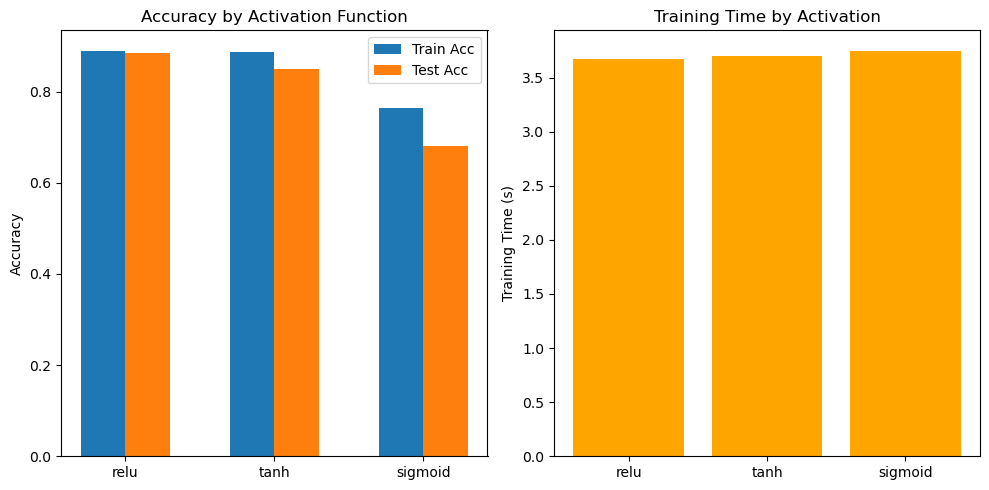

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_informative=8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to build model with chosen activation
def create_model(activation='relu', input_dim=10):
    model = Sequential()
    model.add(Dense(6, input_dim=input_dim, activation=activation))
    model.add(Dense(4, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Activation functions to compare
activations = ['relu', 'tanh', 'sigmoid']
results = {}

# Train and evaluate each model
for act in activations:
    print(f"\nTraining with activation: {act}")
    model = create_model(activation=act)

    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    end_time = time.time()

    train_time = end_time - start_time
    train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    preds = model.predict(X_test[:5]).flatten()

    print(f"Training Time: {train_time:.2f}s")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy:  {test_acc:.4f}")
    print("Sample Predictions:", np.round(preds, 2))

    # Save results
    results[act] = {
        'train_time': train_time,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'predictions': preds
    }

# Optional: Plot accuracy comparison
activs = list(results.keys())
train_accuracies = [results[a]['train_acc'] for a in activs]
test_accuracies = [results[a]['test_acc'] for a in activs]
times = [results[a]['train_time'] for a in activs]

x = np.arange(len(activs))
width = 0.3

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(x - width/2, train_accuracies, width, label='Train Acc')
plt.bar(x + width/2, test_accuracies, width, label='Test Acc')
plt.xticks(x, activs)
plt.ylabel('Accuracy')
plt.title('Accuracy by Activation Function')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(activs, times, color='orange')
plt.ylabel('Training Time (s)')
plt.title('Training Time by Activation')
plt.tight_layout()
plt.show()
